#### **1. Importing Required Package and Modules**

Installation of the necessary modules.

In [ ]:
%pip install seaborn
%pip install scikit-learn
%pip install matplotlib
%pip install aisp
%pip install pandas

In [1]:
# Importing the negative selection.
from aisp.NSA import BNSA

# Importing the other packages.
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

#### **2. Load the database and binarize them.**

Loading the "Mushroom" dataset. This dataset contains information about mushrooms with two output categories: poisonous and edible. It includes the following 22 characteristics per sample:

1. Cap-shape: convex, conical, flat, knobbed, bell, sunken.
2. Cap-surface: fibrous, grooves, smooth, scaly.
3. Cap-color: brown, gray, pink, green, purple, red, white, yellow, chocolate.
4. Bruises: yes, no.
5. Odor: almond, anise, creosote, foul, spicy, fishy, floury, mushroomy, none.
6. Gill-attachment: attached, free, none.
7. Gill-spacing: close, crowded.
8. Gill-size: broad, narrow.
9. Gill-color: black, brown, pink, gray, orange, pink, green, purple, red, white, yellow, chocolate.
10. Stalk-shape: enlarging, tapering.
11. Stalk-root: bulbous, club, cup, equal, rooted, missing.
12. Stalk-surface-above-ring: fibrous, scaly, silky, smooth.
13. Stalk-surface-below-ring: fibrous, scaly, silky, smooth.
14. Stalk-color-above-ring: brown, gray, pink, orange, white, yellow, red, chocolate.
15. Stalk-color-below-ring: brown, gray, pink, orange, white, yellow, red, chocolate.
16. Veil-type: partial, universal.
17. Veil-color: brown, orange, white, yellow.
18. Ring-number: none, one, two.
19. Ring-type: evanescent, large, none, pendant.
20. Spore-print-color: black, brown, pink, green, orange, purple, white, yellow, chocolate.
21. Population: abundant, clustered, numerous, scattered, several, solitary.
22. Habitat: grasses, leaves, meadows, paths, urban, waste, woods.

This dataset is also available at the following links: [kaggle](https://www.kaggle.com/datasets/uciml/mushroom-classification) and [UCIML](https://archive.ics.uci.edu/dataset/73/mushroom).


Mushroom. (1987). UCI Machine Learning Repository. https://doi.org/10.24432/C5959T.

In [2]:
# Load the database
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'
mushrooms = pd.read_csv(url, header=None)

Normalizes the dataset to binary using one-hot encoding with the "get_dummies" method from pandas.

In [3]:
# Create column names
columns = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment',
           'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
           'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type',
           'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']

mushrooms.columns = columns

# Convert all categorical variables to binary variables
mushrooms_binary = pd.get_dummies(mushrooms, columns=columns[1:], drop_first=True)
dados = mushrooms_binary.drop('class', axis=1).to_numpy()
classes = mushrooms['class'].replace(['e', 'p'], ['edible', 'poisonous']).to_numpy()

print(f"Number of samples: {dados.shape[0]}\nNumber of dimensions: {dados.shape[1]}")

Number of samples: 8124
Number of dimensions: 95


#### **3. Separation of training and testing (30% for testing)**

In [4]:
# Gerando os conjuntos de treinamento e teste.
train_x, test_x, train_y, test_y = train_test_split(dados, classes, test_size=0.30)

#### **4. Cross Validation.**

Model performance is evaluated through cross-validation. In each iteration, 10% of the training data is reserved for testing.

In [5]:
accuracy_list = list()

# Model Initialization
model = BNSA(N=250, aff_thresh=0.50, max_discards=1000)

for i in range(0, 50):
    # Split the training set, setting aside 1/10 of the data for validation.
    train_model_x, valid_x, train__model_y, valid_y = train_test_split(train_x, train_y, test_size=0.1)

    # Fit the model using the other 90% of the data
    model.fit(train_model_x, train__model_y, verbose=False)

    # Accuracy calculation for validation set:
    prev_y = model.predict(valid_x)
    accuracy_list.append(accuracy_score(prev_y, valid_y))

# Display the mean accuracy and its standard deviation
print(f"The average accuracy is: {np.average(np.array(accuracy_list)):.6f}")
print(f"Standard deviation of accuracies: {np.std(np.array(accuracy_list)):.6f}")


The average accuracy is: 0.918946
Standard deviation of accuracies: 0.025903


**5. Fitting the model using the training set in its entirety****

In [6]:
# Creating the model with all data separated for training.
model.fit(train_x, train_y)
print('Model Total Adjusted!')

Generating the detectors for the edible class: ┇          ┇ 0/500 detectors

✔ Non-self detectors for classes (edible, poisonous) successfully generated:  ┇██████████┇ 500/500 detectors

Model Total Adjusted!


**6. Display report and confusion matrix for test set**

The accuracy is 0.9056603773584906
              precision    recall  f1-score   support

      edible       0.85      0.99      0.91      1227
   poisonous       0.99      0.82      0.90      1211

    accuracy                           0.91      2438
   macro avg       0.92      0.91      0.90      2438
weighted avg       0.92      0.91      0.90      2438



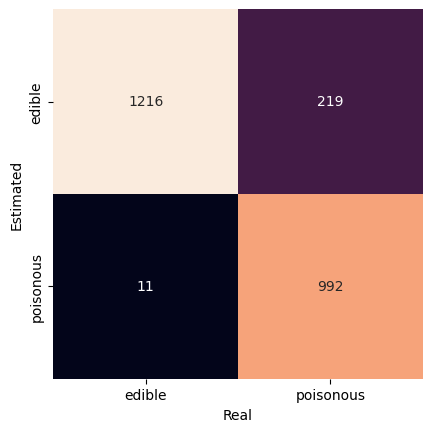

In [7]:
# Previewing classes with test samples.
prev_y = model.predict(test_x)
# Showing the accuracy of predictions for actual data.
print(f"The accuracy is {accuracy_score(prev_y, test_y)}")
print(classification_report(test_y, prev_y))
# Generating the confusion matrix and plotting it graphically.
mat = confusion_matrix(y_true=test_y, y_pred=prev_y)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=model.classes, yticklabels=model.classes)
plt.xlabel('Real')
plt.ylabel('Estimated')
plt.show()